In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report

In [81]:
df= pd.read_csv("C:\\data science class\\assignments\\PCA\\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [82]:
X = df.drop(columns=['Type'])
Y = df['Type']

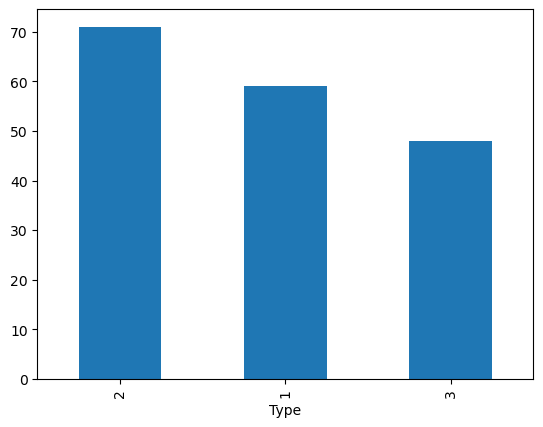

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoids'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'Dilution'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

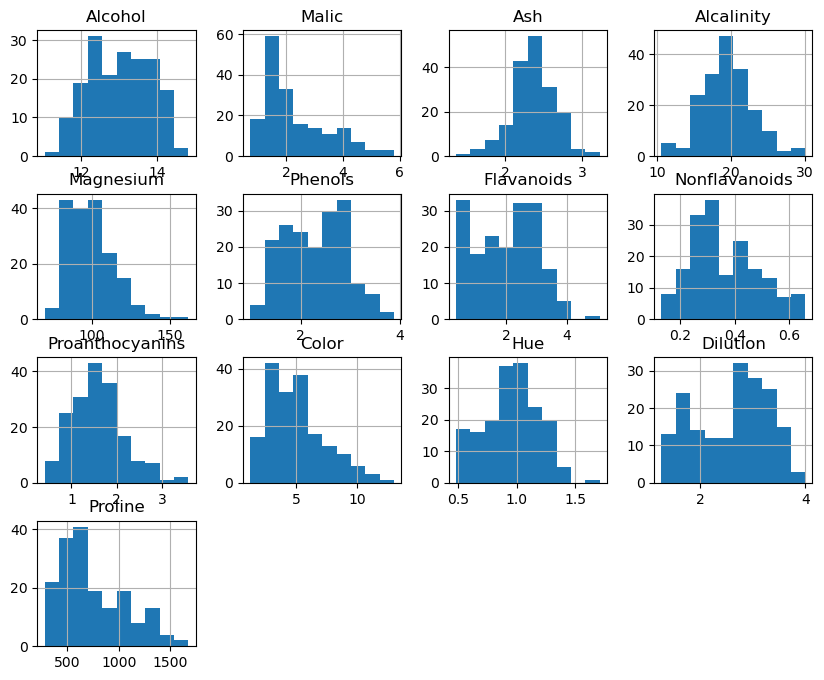

In [83]:
#EDA
val = Y.value_counts()
val.plot(kind='bar')
plt.show()
X.hist(figsize=(10,8))

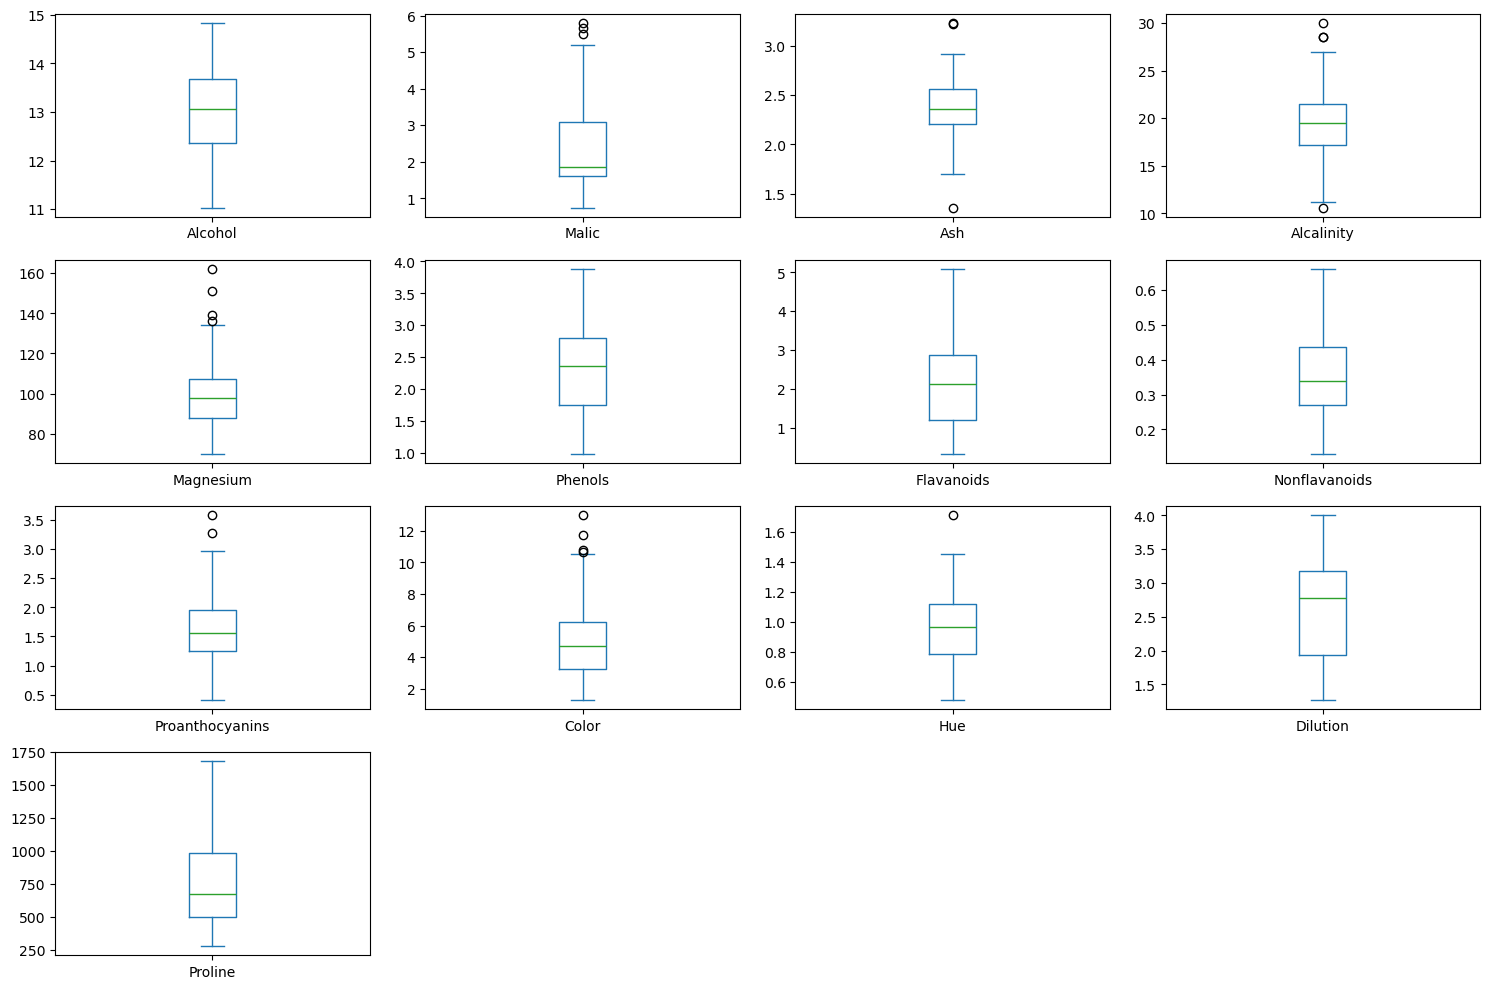

In [84]:
#boxplot
X.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


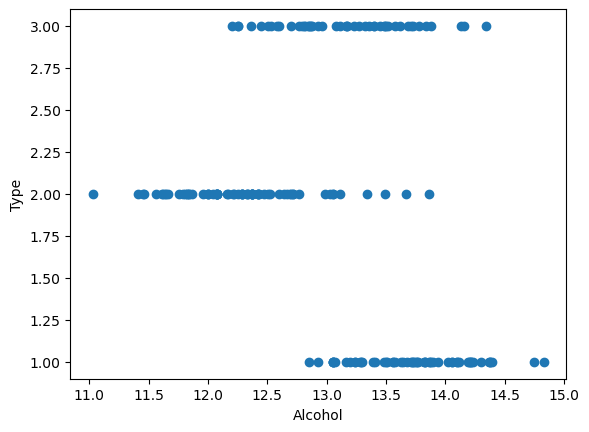

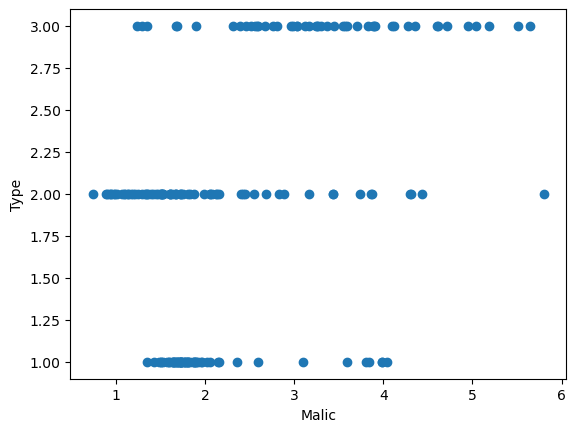

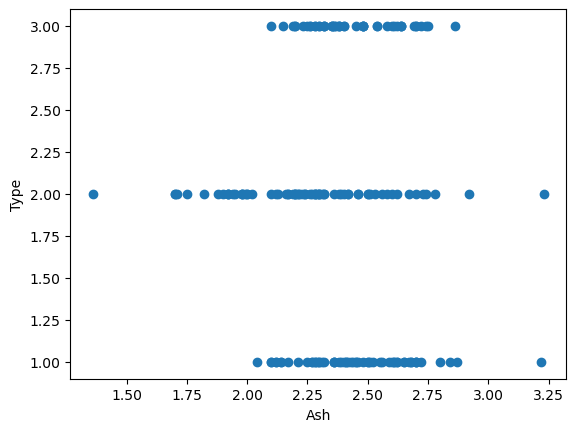

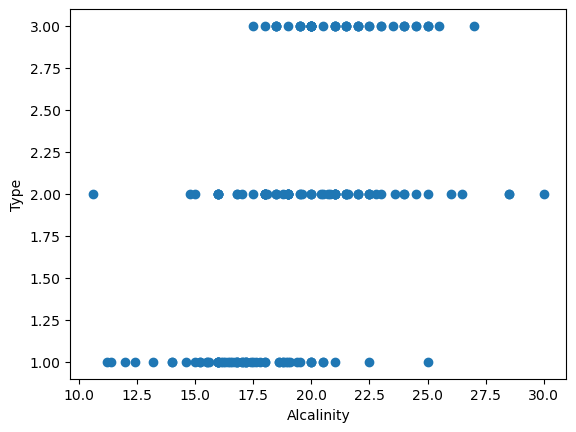

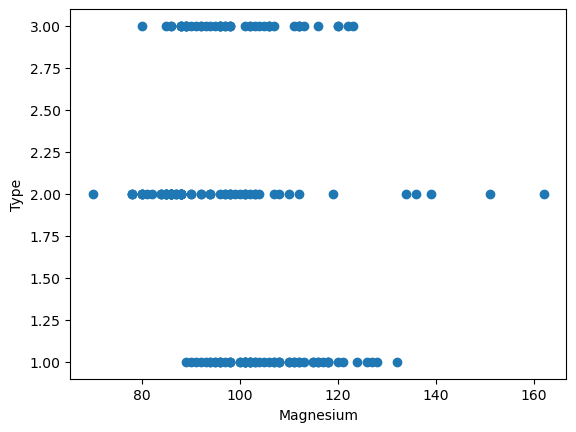

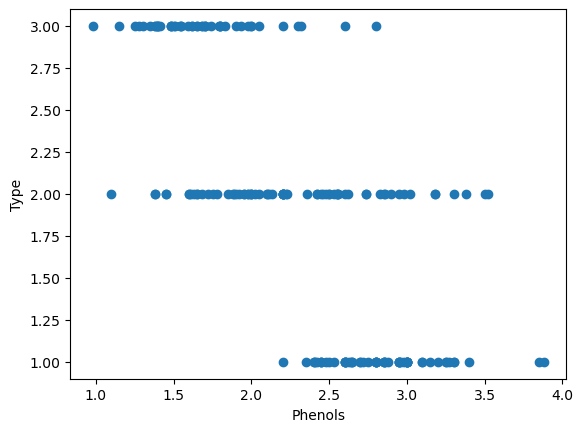

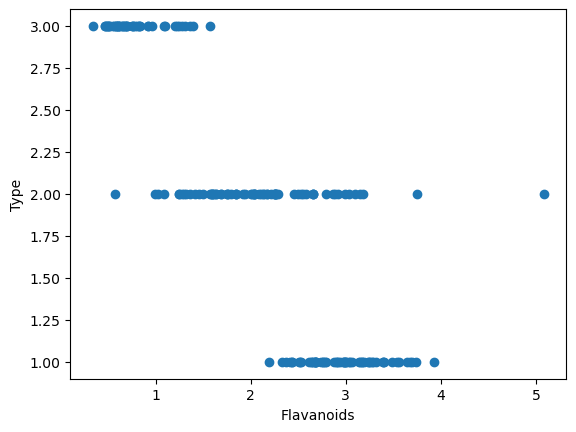

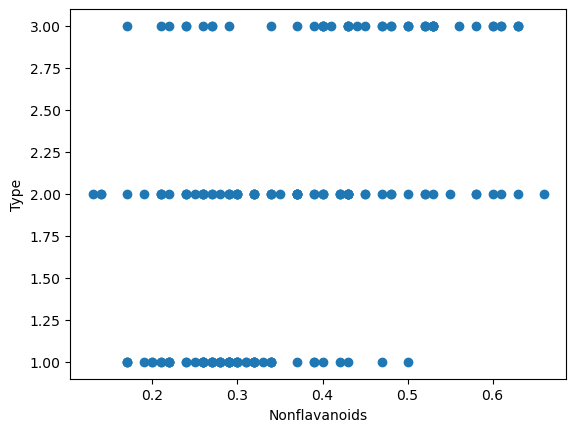

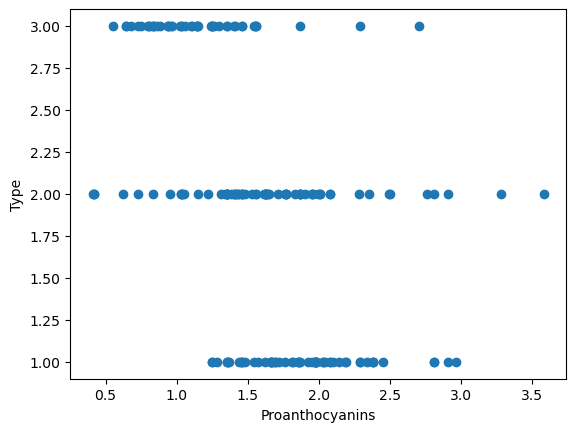

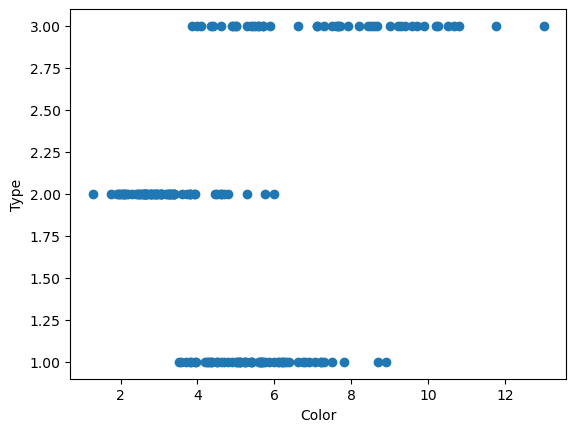

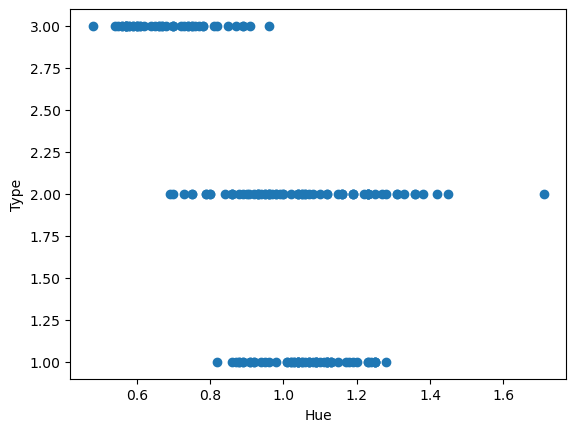

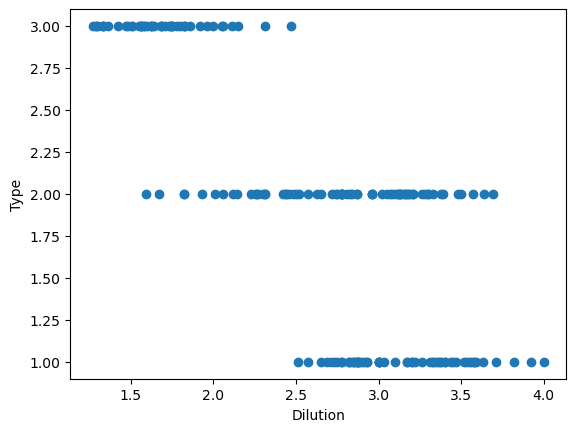

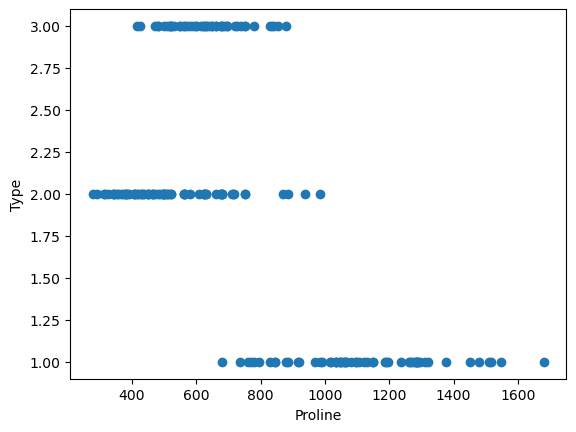

In [85]:
#Scatterplot
df.info()
for i in  X.columns:
    plt.scatter(y=df['Type'], x=df[i])
    plt.xlabel(f"{i}")
    plt.ylabel("Type")
    plt.show()


<Axes: >

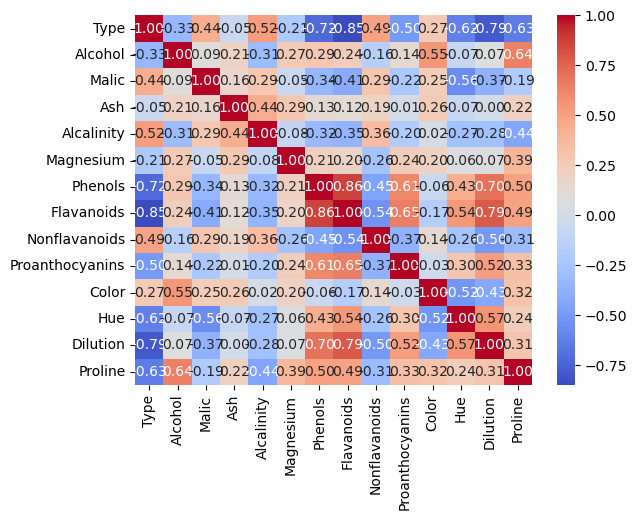

In [86]:
df.corr()
plt.show()
sns.heatmap(df.corr(), annot= True, fmt='.2f', cmap = 'coolwarm')

In [87]:
#Data Cleaning
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [88]:
#Data Transformation
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS= SS.fit_transform(df.iloc[:,1:])
SS= pd.DataFrame(SS)
SS.columns = list(df.iloc[:,1:])

df_new=pd.concat([df['Type'], SS], axis=1)
df_new

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,3,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,3,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,3,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [89]:
#Data Partition
X = df_new.drop(columns=['Type'] )
Y = df_new['Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42)

In [90]:
#Model fitting with Standardization and Logistic Regression and cross valodation
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
train_accuracy= []
test_accuracy = []
for i in range(1,501):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=i)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    

print("train accuracy",np.round(np.mean(train_accuracy),4))
print("test accuracy",np.round(np.mean(test_accuracy),4))



train accuracy 1.0
test accuracy 0.9792


In [91]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA()
pc = pca.fit_transform(X)
pc = pd.DataFrame(pc)
pc.var()
X_new=pc.iloc[:,:n_components]
df_pc = pd.concat([X_new, Y], axis=1)
df_pc

,0,1,Type
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1
...,...,...,...
173,-3.370524,2.216289,3
174,-2.601956,1.757229,3
175,-2.677839,2.760899,3
176,-2.387017,2.297347,3


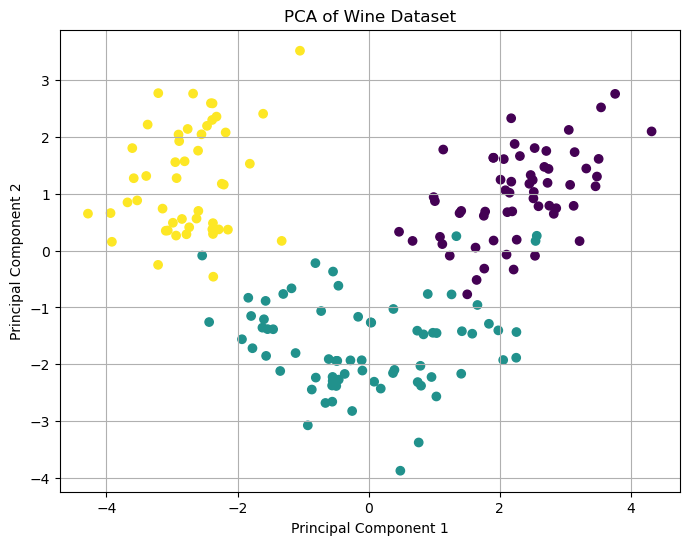

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pc.iloc[:, 0:1], df_pc.iloc[:, 1:2], c=df_pc['Type'])
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [93]:
#cross validation
training_accuracy = []
test_accuracy = []
    
for i in range(1,501):
    X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y, test_size=0.3,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_traning = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_traning))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
    
import numpy as np
print("Cross validaton training accuracy:",np.round(np.mean(training_accuracy),2))
print("Cross validaton test accuracy:",np.round(np.mean(test_accuracy),2))

Cross validaton training accuracy: 0.97
Cross validaton test accuracy: 0.96


In [95]:
#applying cluster on original dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3, random_state=42, n_init=10) # Set n_init explicitly
clusters = kmeans.fit_predict(SS)
df['KMeans_Cluster'] = clusters
df

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(SS, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.2849


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          0         1  Type  KMeans_Cluster
0  3.316751  1.443463     1               2
1  2.209465 -0.333393     1               2
2  2.516740  1.031151     1               2
3  3.757066  2.756372     1               2
4  1.008908  0.869831     1               2


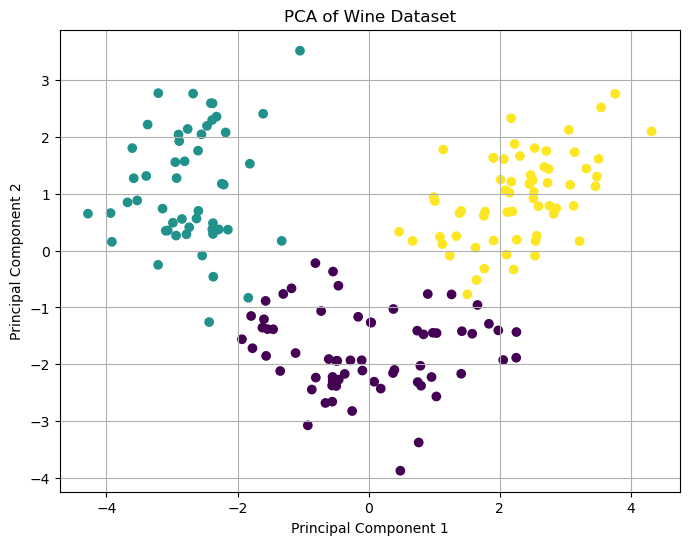

In [96]:
#applying cluster on PCA
df_pc['KMeans_Cluster'] = clusters
print(df_pc.head())

plt.figure(figsize=(8, 6))
plt.scatter(df_pc.iloc[:, 0:1], df_pc.iloc[:, 1:2], c=df_pc['KMeans_Cluster'])
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [97]:
silhouette_avg = silhouette_score(SS, clusters)
print(f"\nSilhouette Score with original dataset: {silhouette_avg:.4f}")

silhouette_avg = silhouette_score(X_new, clusters)
print(f"\nSilhouette Score with PCA : {silhouette_avg:.4f}")


Silhouette Score with original dataset: 0.2849

Silhouette Score with PCA : 0.5583


In [99]:
'''
from above score i conclude that, K-means clustering on the original standardized data shows better agreement with the original wine types. '''

'\nfrom above score i conclude that, K-means clustering on the original standardized data shows better agreement with the original wine types. '